In [40]:
from modules import *
from mlp_numpy import MLP

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn import metrics
import matplotlib.pyplot as plt
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SEED = 27

In [69]:
NUM_POINTS = 2000
N_CLASSES = 2
N_HIDDEN = [5, 5, 5]

MAX_EPOCHS = 300
LR = 0.001
BATCH_SIZE = 8

VERBOSE = 10

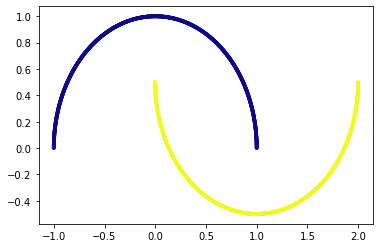

In [42]:
x, y = make_moons(NUM_POINTS, random_state=SEED)
plt.scatter(x[:, 0], x[:, 1], c=y, s=8, cmap="plasma")
plt.show()

y = np.eye(N_CLASSES)[y]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED);

In [74]:
xx = np.linspace(-1.5, 2.5, 300) 
yy = np.linspace(-0.75, 1.25, 300)
X, Y = np.meshgrid(xx, yy)
xy = np.c_[X.ravel(), Y.ravel()]

In [76]:
mlp = MLP(x.shape[1], N_HIDDEN, N_CLASSES)
loss = CrossEntropy()

np.random.seed(SEED)

print("Train set shape", x_train.shape)
num_batches=len(x_train)//BATCH_SIZE
print("Num of batches =", num_batches)

for epoch in range(MAX_EPOCHS):
    random_index=np.random.choice(len(x_train), size=len(x_train), replace=False)
    for i in range(num_batches):
        batch_index=random_index[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        x_batch=x_train[batch_index]
        y_batch=y_train[batch_index]
        
        out_batch=mlp.forward(x_batch)
        loss_grad=loss.backward(out_batch, y_batch)
        trash=mlp.backward(loss_grad)
        
        for layer in mlp.layers:
            if isinstance(layer, Linear):
                layer.params["weight"]-=LR*layer.grads["weight"]
                layer.params["bias"]-=LR*layer.grads["bias"]
    
    out_train=mlp.forward(x_train)
    train_loss=loss.forward(out_train, y_train)
    train_acc=metrics.accuracy_score(np.argmax(out_train, axis=1), np.argmax(y_train, axis=1))
    
    out_test=mlp.forward(x_test)
    test_loss=loss.forward(out_test, y_test)
    test_acc=metrics.accuracy_score(np.argmax(out_test, axis=1), np.argmax(y_test, axis=1))
    
    plt.figure(figsize=(10, 10))
    plt.title(f"Binary classification - epoch: {str(epoch+1).zfill(3)}", fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    pred = np.argmax(mlp.forward(xy), axis=1)
    Z = pred.reshape(X.shape)
    plt.contourf(X, Y, Z, alpha = 0.7, cmap=plt.cm.Spectral);
    plt.scatter(x_train[:, 0], x_train[:, 1], c=np.argmax(y_train, axis=1), s=50, cmap=plt.cm.Spectral);
    plt.savefig(f"./images/{epoch+1}.png");
    plt.close()
    
    if (epoch+1)%VERBOSE==0:
        print(datetime.datetime.now(), "Epoch", epoch+1, "\tTrain Loss = %.5f" % train_loss, "Train acc = %.3f " % train_acc, "Test Loss = %.5f" % test_loss, "Test acc = %.3f " % test_acc)

print();

Train set shape (1600, 2)
Num of batches = 200
2022-02-28 23:52:09.829821 Epoch 10 	Train Loss = 0.28328 Train acc = 0.875  Test Loss = 0.27243 Test acc = 0.877 
2022-02-28 23:52:13.922194 Epoch 20 	Train Loss = 0.26977 Train acc = 0.867  Test Loss = 0.26541 Test acc = 0.873 
2022-02-28 23:52:17.868803 Epoch 30 	Train Loss = 0.23710 Train acc = 0.881  Test Loss = 0.23179 Test acc = 0.882 
2022-02-28 23:52:22.030238 Epoch 40 	Train Loss = 0.21492 Train acc = 0.907  Test Loss = 0.21519 Test acc = 0.910 
2022-02-28 23:52:26.441728 Epoch 50 	Train Loss = 0.19325 Train acc = 0.925  Test Loss = 0.19747 Test acc = 0.927 
2022-02-28 23:52:31.831849 Epoch 60 	Train Loss = 0.14768 Train acc = 0.949  Test Loss = 0.15324 Test acc = 0.940 
2022-02-28 23:52:35.916476 Epoch 70 	Train Loss = 0.10442 Train acc = 0.969  Test Loss = 0.10985 Test acc = 0.965 
2022-02-28 23:52:40.034338 Epoch 80 	Train Loss = 0.07607 Train acc = 0.983  Test Loss = 0.08214 Test acc = 0.975 
2022-02-28 23:52:44.442083 Epoch 

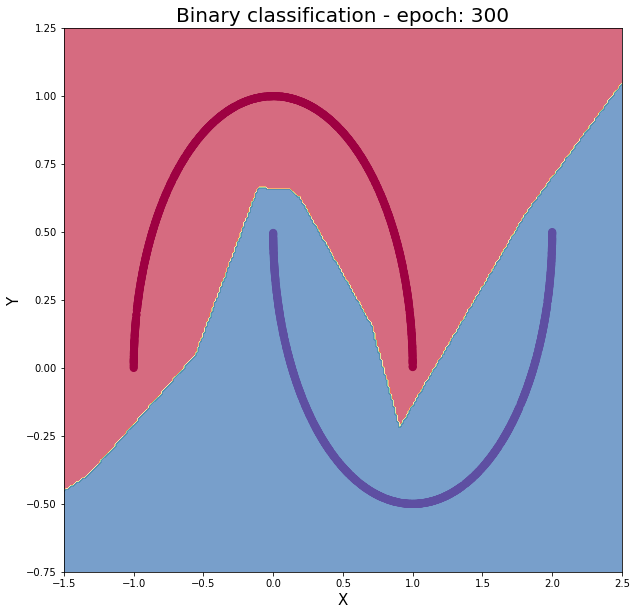

In [77]:
plt.figure(figsize=(10, 10))
plt.title(f"Binary classification - epoch: {epoch+1}", fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
pred = np.argmax(mlp.forward(xy), axis=1)
Z = pred.reshape(X.shape)
plt.contourf(X, Y, Z, alpha = 0.7, cmap=plt.cm.Spectral)
plt.scatter(x_train[:, 0], x_train[:, 1], c=np.argmax(y_train, axis=1), s=50, cmap=plt.cm.Spectral)
plt.show();

<img src="./images/10-10.gif">
<img src="./images/5-5-5.gif">